In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Advertising.csv",index_col=0)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

There are total 3 features and 200 records

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.duplicated().sum()

0

There are no repeated entry in the dataset

In [9]:
features=["TV","Radio","Newspaper"]

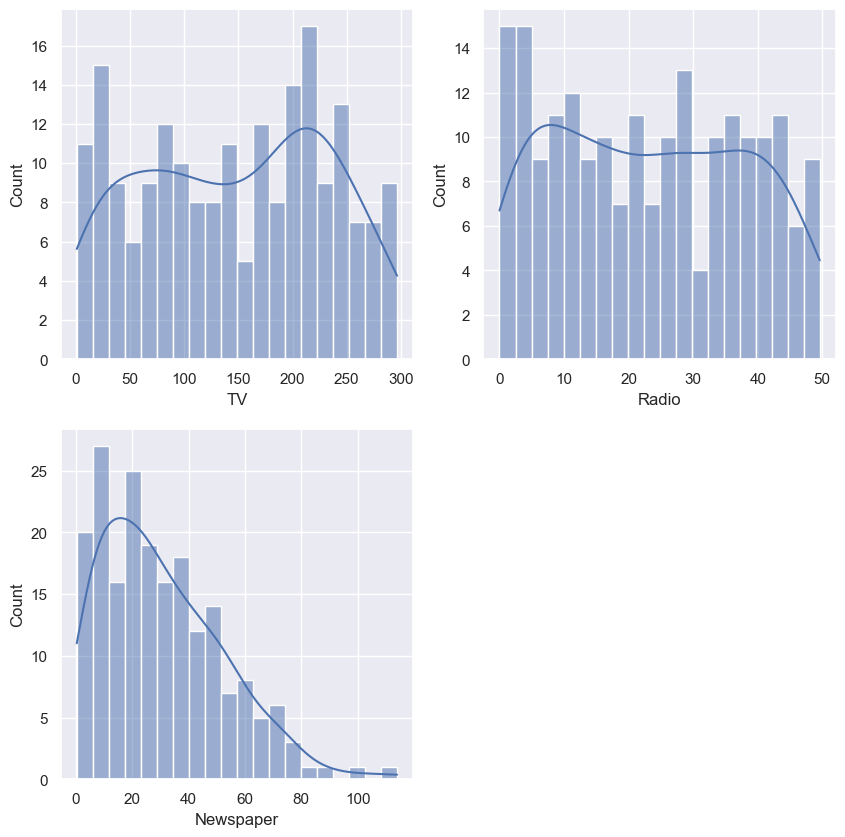

In [10]:
sns.set(rc={"figure.figsize":(10, 10)})
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=col,bins=20,kde=True)

<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

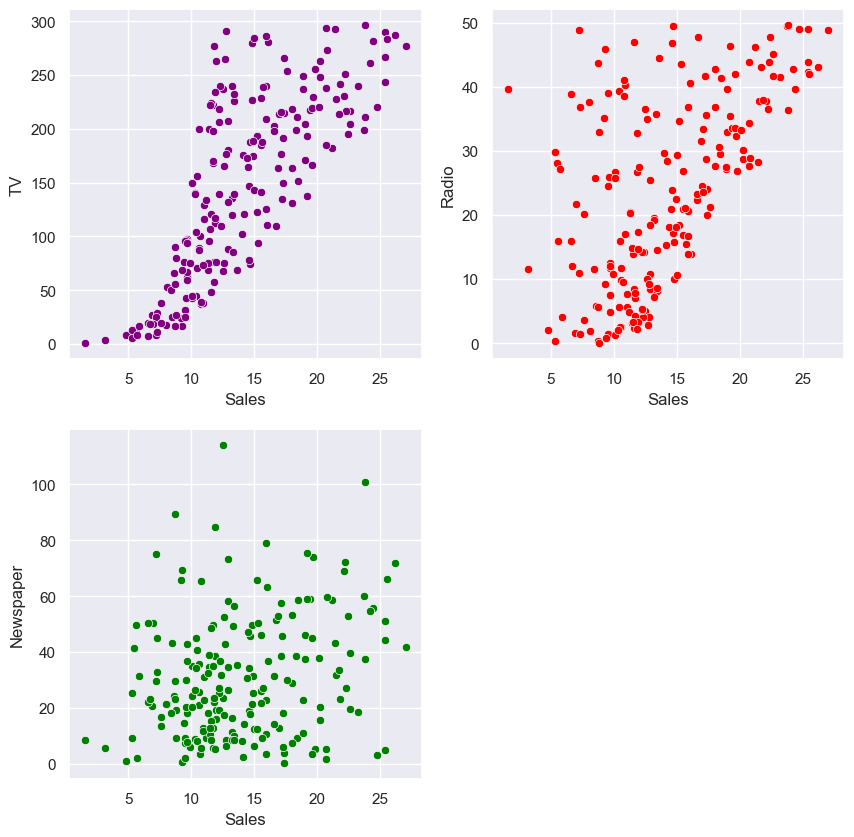

In [11]:
sns.set(rc={"figure.figsize":(10, 10)})
plt.subplot(2,2,1)
sns.scatterplot(data=df,x="Sales",y="TV",color="purple")
plt.subplot(2,2,2)
sns.scatterplot(data=df,x="Sales",y="Radio",color="red")
plt.subplot(2,2,3)
sns.scatterplot(data=df,x="Sales",y="Newspaper",color="green")

<AxesSubplot:>

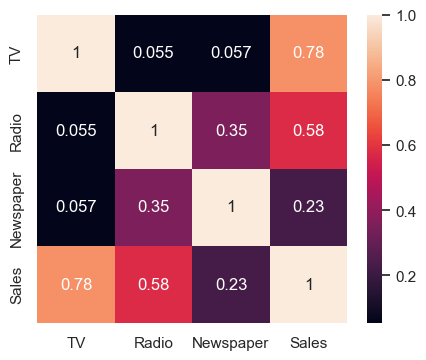

In [12]:
sns.set(rc={"figure.figsize":(5, 4)})
sns.heatmap(df.corr(),annot=True)

Sales is showing more relation with TV

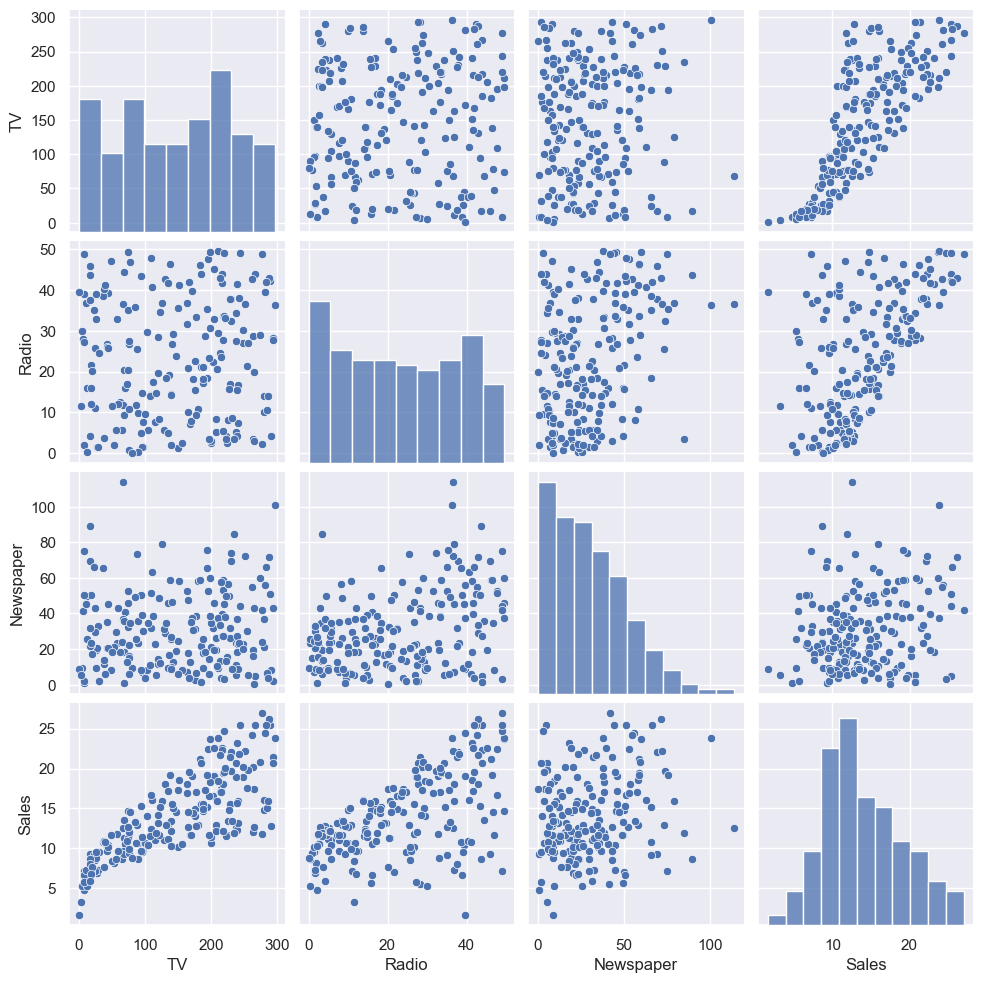

In [13]:
sns.pairplot(data=df)

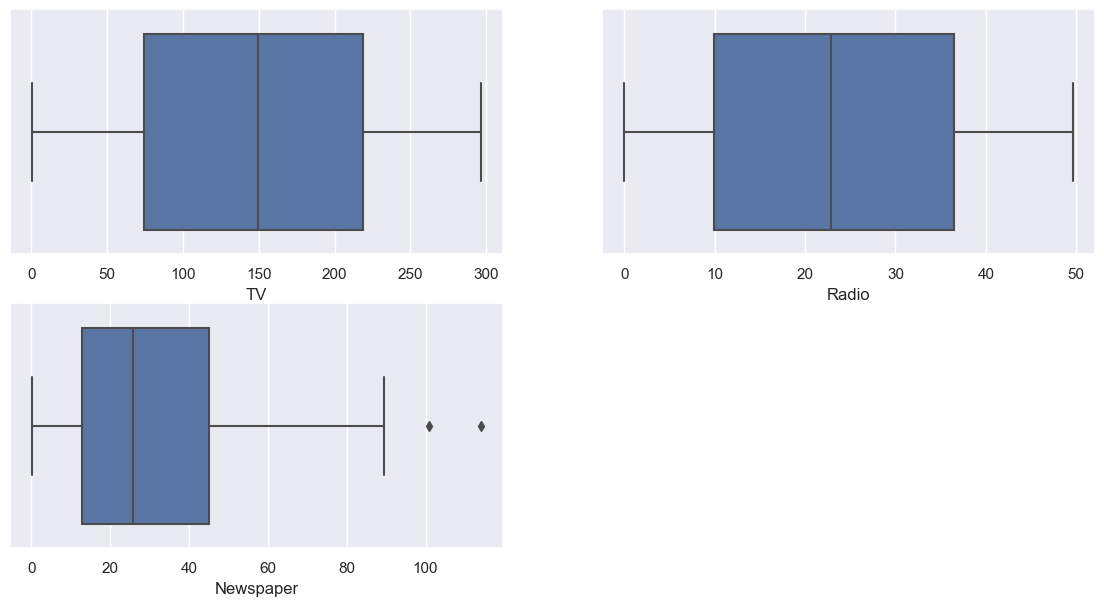

In [14]:
sns.set(rc={"figure.figsize":(14, 7)})
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x=col, orient='h')

There are some outliers in the dataset

In [15]:
#function to find and remove the outliers
def remove_outliers(col):
    d25=df[col].quantile(0.25)
    d75=df[col].quantile(0.75)
    diqr=d75-d25
    upper_lim=d75+1.5*diqr
    lower_lim=d25-1.5*diqr
    filter_data=df[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ]
    return filter_data

df=remove_outliers('Newspaper')

The outliers are removed

In [17]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
df[features]=SC.fit_transform(df[features])

C:\Users\DELL\AppData\Local\Temp\ipykernel_31028\4260459793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[features]=SC.fit_transform(df[features])


The features are scaled in a range

In [18]:
df.head()

,TV,Radio,Newspaper,Sales
1,0.978697,0.989521,1.932998,22.1
2,-1.199012,1.090705,0.751313,10.4
3,-1.519332,1.535913,1.937901,9.3
4,0.056456,1.225616,1.408349,18.5
5,0.400243,-0.831784,1.403446,12.9


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
X = df.drop(['Sales'],axis=1)
Y = df['Sales']

In [21]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'decisionTree_regression': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'n_estimators':[20,50,100]
            }
        },
        'svr':{
            'model':SVR(),
            'params':{
                'kernel':['linear', 'poly', 'rbf', 'sigmoid']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return scores

In [22]:
scores=find_best_model_using_gridsearchcv(X,Y)

In [23]:
pd.DataFrame(scores,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,linear_regression,0.906552,{}
1,decisionTree_regression,0.955640,"{'criterion': 'absolute_error', 'splitter': 'b..."
2,random_forest,0.980304,"{'criterion': 'poisson', 'n_estimators': 100}"
3,svr,0.926329,{'kernel': 'rbf'}


In [24]:
scores[2]

{'model': 'random_forest',
 'best_score': 0.9803042287260519,
 'best_params': {'criterion': 'poisson', 'n_estimators': 100}}

In [25]:
#splitting data into train and test
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
model=RandomForestRegressor(criterion="poisson",n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson')

In [27]:
model.score(x_test,y_test)

0.9843407335444693

The score is approx to 98% on the test data

In [28]:
y_predicted=model.predict(x_test)

Text(0, 0.5, 'Predicted Test Values')

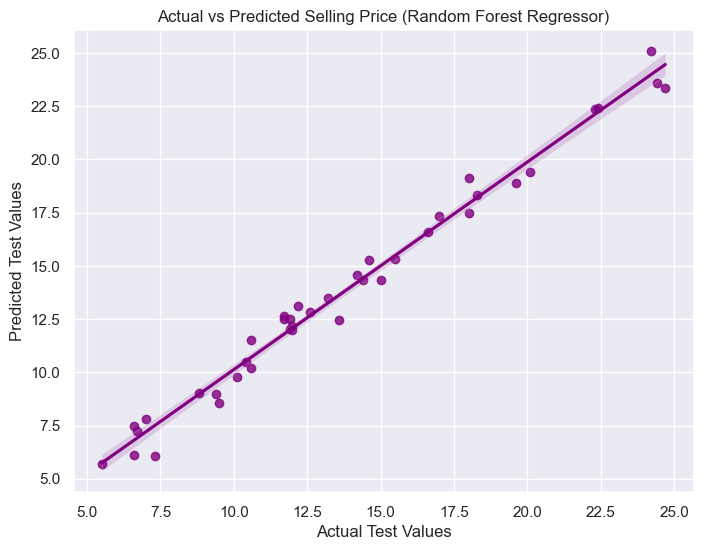

In [29]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.regplot(x=y_test,y=y_predicted,color='purple')
plt.title('Actual vs Predicted Selling Price (Random Forest Regressor)')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Test Values')